## Home Task 

## Import

In [14]:
! pip install XGBoost

In [1]:
# Import necessary libraries
import os
from IPython.display import Image
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree


from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


## `Breast Cancer Dataset Overview ` 

The **Breast Cancer Wisconsin** dataset is a commonly used dataset for binary classification, where the goal is to distinguish between **benign** and **malignant** tumors based on 30 numerical features extracted from digitized images of breast tissue.

### Dataset Summary  
- **Samples:** 569  
- **Features:** 30 (e.g., radius, texture, perimeter, area, smoothness)  
- **Classes:** 2 (Benign & Malignant)  


## Loading the Cancer Dataset

In [2]:
# Load the dataset
cancer = load_breast_cancer()
X, y, labels, feature_names = cancer.data, cancer.target, cancer.target_names, cancer.feature_names
df_cancer = pd.DataFrame(X, columns=feature_names) 
df_cancer['label'] = y

# Mapping Numeric Labels to Class Names
label_mapping = {k: v for k, v in enumerate(labels)}
df_cancer['label_names'] = df_cancer['label'].map(label_mapping)

# Display the first few rows
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label,label_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


### Shape of the dataset

In [3]:
# Check the shape of the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Number of samples: {X.shape[0]}")
print()

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569



### Statistical Summary of the Data

In [4]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Checking Class Distribution

In [5]:
df_cancer.groupby('label_names').size()

label_names
benign       357
malignant    212
dtype: int64

### Splitting the Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Dictionary to store models
models = {}

## `Decision Tree Classifier`

A **Decision Tree** is a flowchart-like structure where each internal node represents a decision rule based on a feature, and each leaf node represents an outcome (class).  

Key Features:
- **Supervised Learning Algorithm** for classification & regression.  
- **Works by splitting the dataset** based on feature thresholds.  
- **Entropy & Gini Impurity** are common split criteria.  
- **Prone to Overfitting** if the tree grows too deep.


In [8]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf  = DecisionTreeClassifier(
    criterion='entropy',
    random_state=0,        
    max_depth=6
).fit(X_train, y_train)

models["Decision Tree"] = clf
# END_CODE 

print("train accuracy= {:.3%}".format(clf .score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf .score (X_test, y_test)))
graph_viz = tree.export_graphviz(clf , out_file=None,feature_names=feature_names, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True) # cleanup (bool) – Delete the source file after rendering.

train accuracy= 99.765%
test accuracy= 95.105%


'Source.gv.pdf'

## `Random Forest Classifier `

A **Random Forest** is an ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy and generalization.  

Key Features:
- **Uses multiple decision trees** to reduce variance.  
- **Bootstrapped Sampling**: Each tree is trained on a different random subset of data.  
- **Random Feature Selection**: Each tree considers a random subset of features at each split.  
- **Less prone to overfitting** than a single decision tree.  


In [9]:
from sklearn.ensemble import RandomForestClassifier

# YOUR_CODE.  create the classifier and train it 
# START_CODE 
# Random Forest Classifier
clf  = RandomForestClassifier(
    random_state=10,
    n_estimators=10,  # Number of trees
    max_features=2    # Number of features per split
).fit(X_train, y_train)

models["Random Forest"] = clf
# END_CODE 

print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 99.765%
test accuracy= 97.203%


## `Gradient Boosting Classifier`
**Gradient Boosting** is an ensemble method that builds trees sequentially, where each tree tries to correct the errors made by the previous one.  

 Key Features:
- **Boosting Technique**: Trees are built in sequence, correcting previous errors.  
- **Reduces both bias and variance**, making it more accurate than Random Forests in many cases.  
- **Slower training** compared to Random Forest due to sequential tree building. 


In [10]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
clf  = GradientBoostingClassifier(
    learning_rate=0.02,  # Controls contribution of each tree
    max_depth=3
).fit(X_train, y_train)

models["Gradient Boosting"] = clf
# END_CODE 

print("train accuracy= {:.3%}".format(clf .score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf .score (X_test, y_test)))

train accuracy= 99.296%
test accuracy= 96.503%


## `XGBoost Classifier` 

**XGBoost (Extreme Gradient Boosting)** is an optimized version of gradient boosting that is faster and more efficient.  

 Key Features:
- **Optimized Gradient Boosting** with advanced regularization (L1 & L2).  
- **Highly efficient** with parallel processing and tree pruning.  
- **Built-in handling of missing values**.  
- **Used in Kaggle competitions** due to its high accuracy.  



In [11]:
# YOUR_CODE.  create the classifier and train it 
# START_CODE 
# XGBoost Classifier
clf = XGBClassifier(
    eval_metric='logloss',
    reg_lambda=100,  # Regularization term
    max_depth=7
).fit(X_train, y_train)
models["XGBoost"] = clf
# END_CODE 

print("train accuracy= {:.3%}".format(clf .score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf .score (X_test, y_test)))

train accuracy= 99.296%
test accuracy= 97.902%


# `Observation`


The function `evaluate_models(models, X_train, y_train, X_test, y_test)` evaluates multiple machine learning models by computing their training and testing accuracy. 

**Functionality:**
1. **Initialize dictionaries**: `train_acc` and `test_acc` to store accuracy values.
2. **Iterate through models**:
   - Compute the training accuracy using `clf.score(X_train, y_train) * 100`.
   - Compute the testing accuracy using `clf.score(X_test, y_test) * 100`.
   - Print formatted accuracy results for each model.
3. **Return**:
   - `train_acc`: Dictionary containing training accuracy for each model.
   - `test_acc`: Dictionary containing testing accuracy for each model.

In [21]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
    train_acc = {}
    test_acc = {}

    print("Evaluate Trees")
    for name, clf in models.items():
        train_score = clf.score(X_train, y_train) * 100
        test_score = clf.score(X_test, y_test) * 100
        train_acc[name] = train_score
        test_acc[name] = test_score

        print(f"\n{'='*20}\n{name} Classifier")
        print("Train Accuracy: {:.3%}".format(train_score / 100))
        print("Test Accuracy: {:.3%}".format(test_score / 100))

    return train_acc, test_acc

### Evaluate Trees

In [22]:
train_acc, test_acc = evaluate_models(models, X_train, y_train, X_test, y_test)

Evaluate Trees

Decision Tree Classifier
Train Accuracy: 99.765%
Test Accuracy: 95.105%

Random Forest Classifier
Train Accuracy: 99.765%
Test Accuracy: 97.203%

Gradient Boosting Classifier
Train Accuracy: 99.296%
Test Accuracy: 96.503%

XGBoost Classifier
Train Accuracy: 99.296%
Test Accuracy: 97.902%


### Visualization: Model Accuracy Comparison

The following code generates a **bar chart** to compare the training and testing accuracy of different machine learning models.

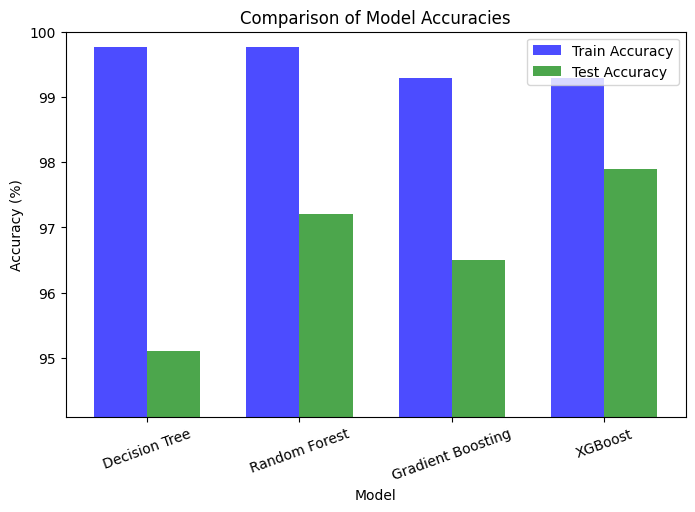

In [24]:
import matplotlib.pyplot as plt
labels = list(train_acc.keys())
train_values = list(train_acc.values())
test_values = list(test_acc.values())

x = np.arange(len(labels))
bar_width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, train_values, bar_width, label="Train Accuracy", color="blue", alpha=0.7)
plt.bar(x + bar_width/2, test_values, bar_width, label="Test Accuracy", color="green", alpha=0.7)

plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.xticks(x, labels, rotation=20)
plt.legend()
plt.ylim(min(min(train_values), min(test_values)) - 1, 100)

plt.show()

### Tree Visualization Output

For `Decision Tree` and `Random Forest` classifiers:
 - It visualizes a single decision tree 
 - The tree structure is saved as a .png image and displayed in Jupyter Notebook.


Decision Tree Classifier


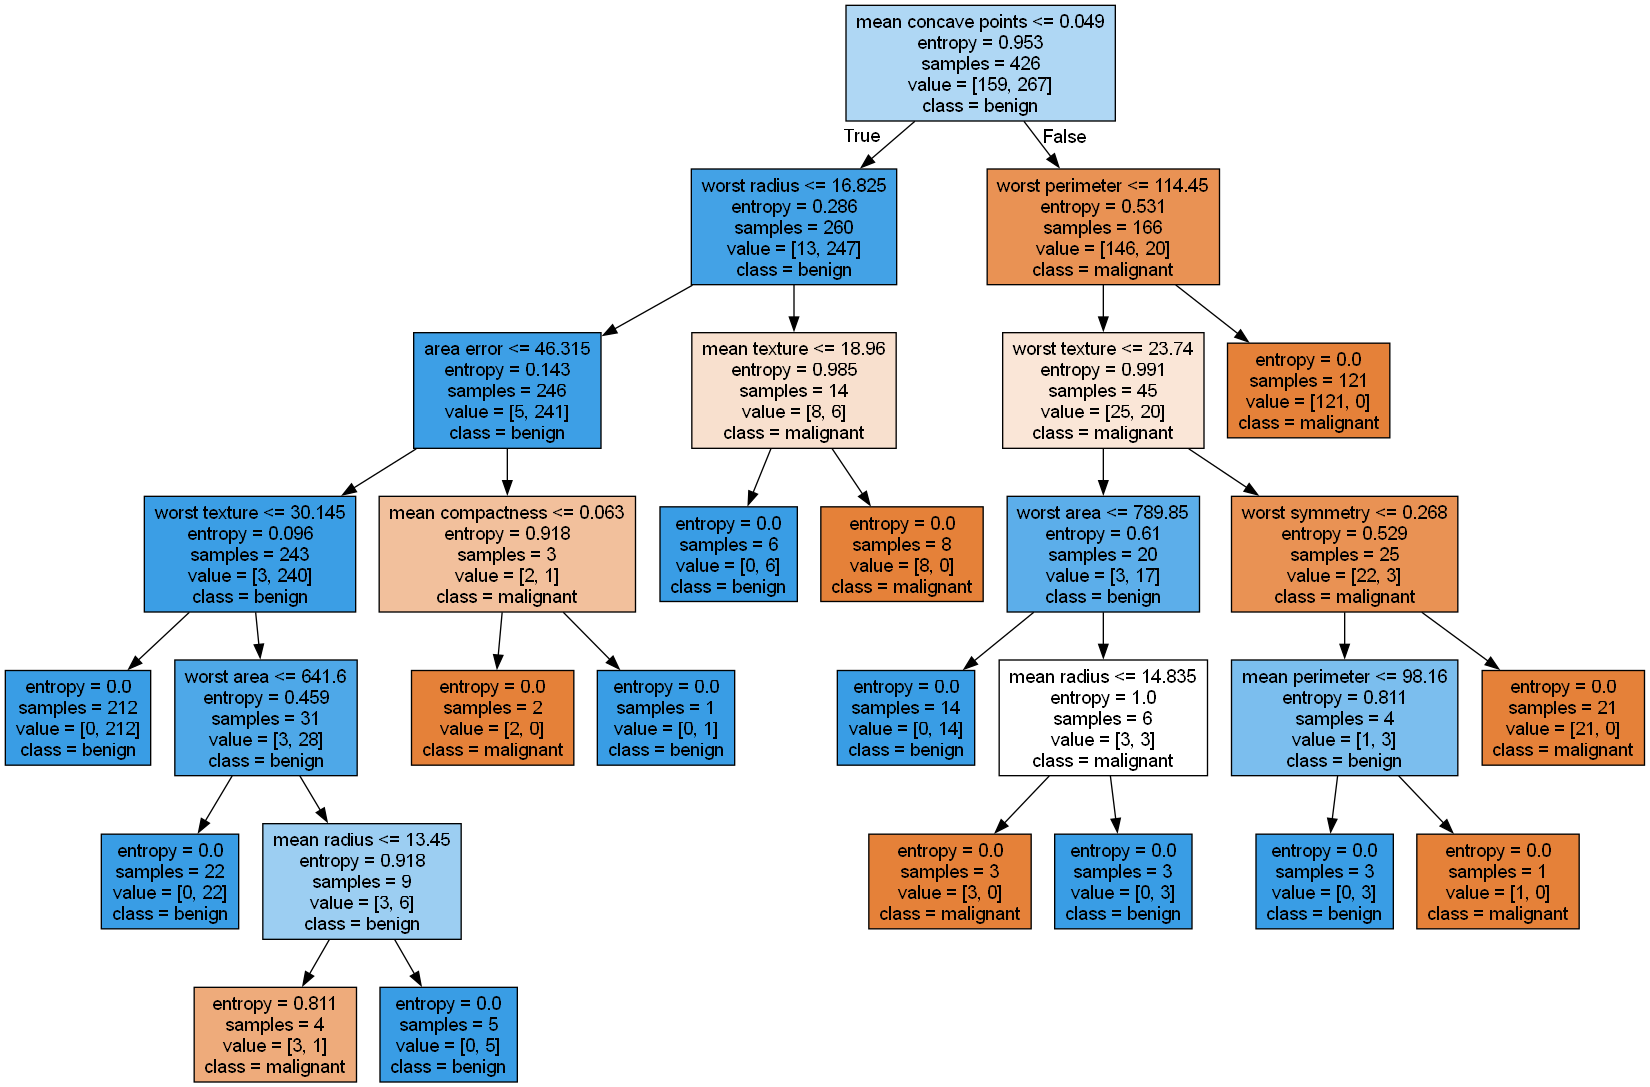

Random Forest Classifier


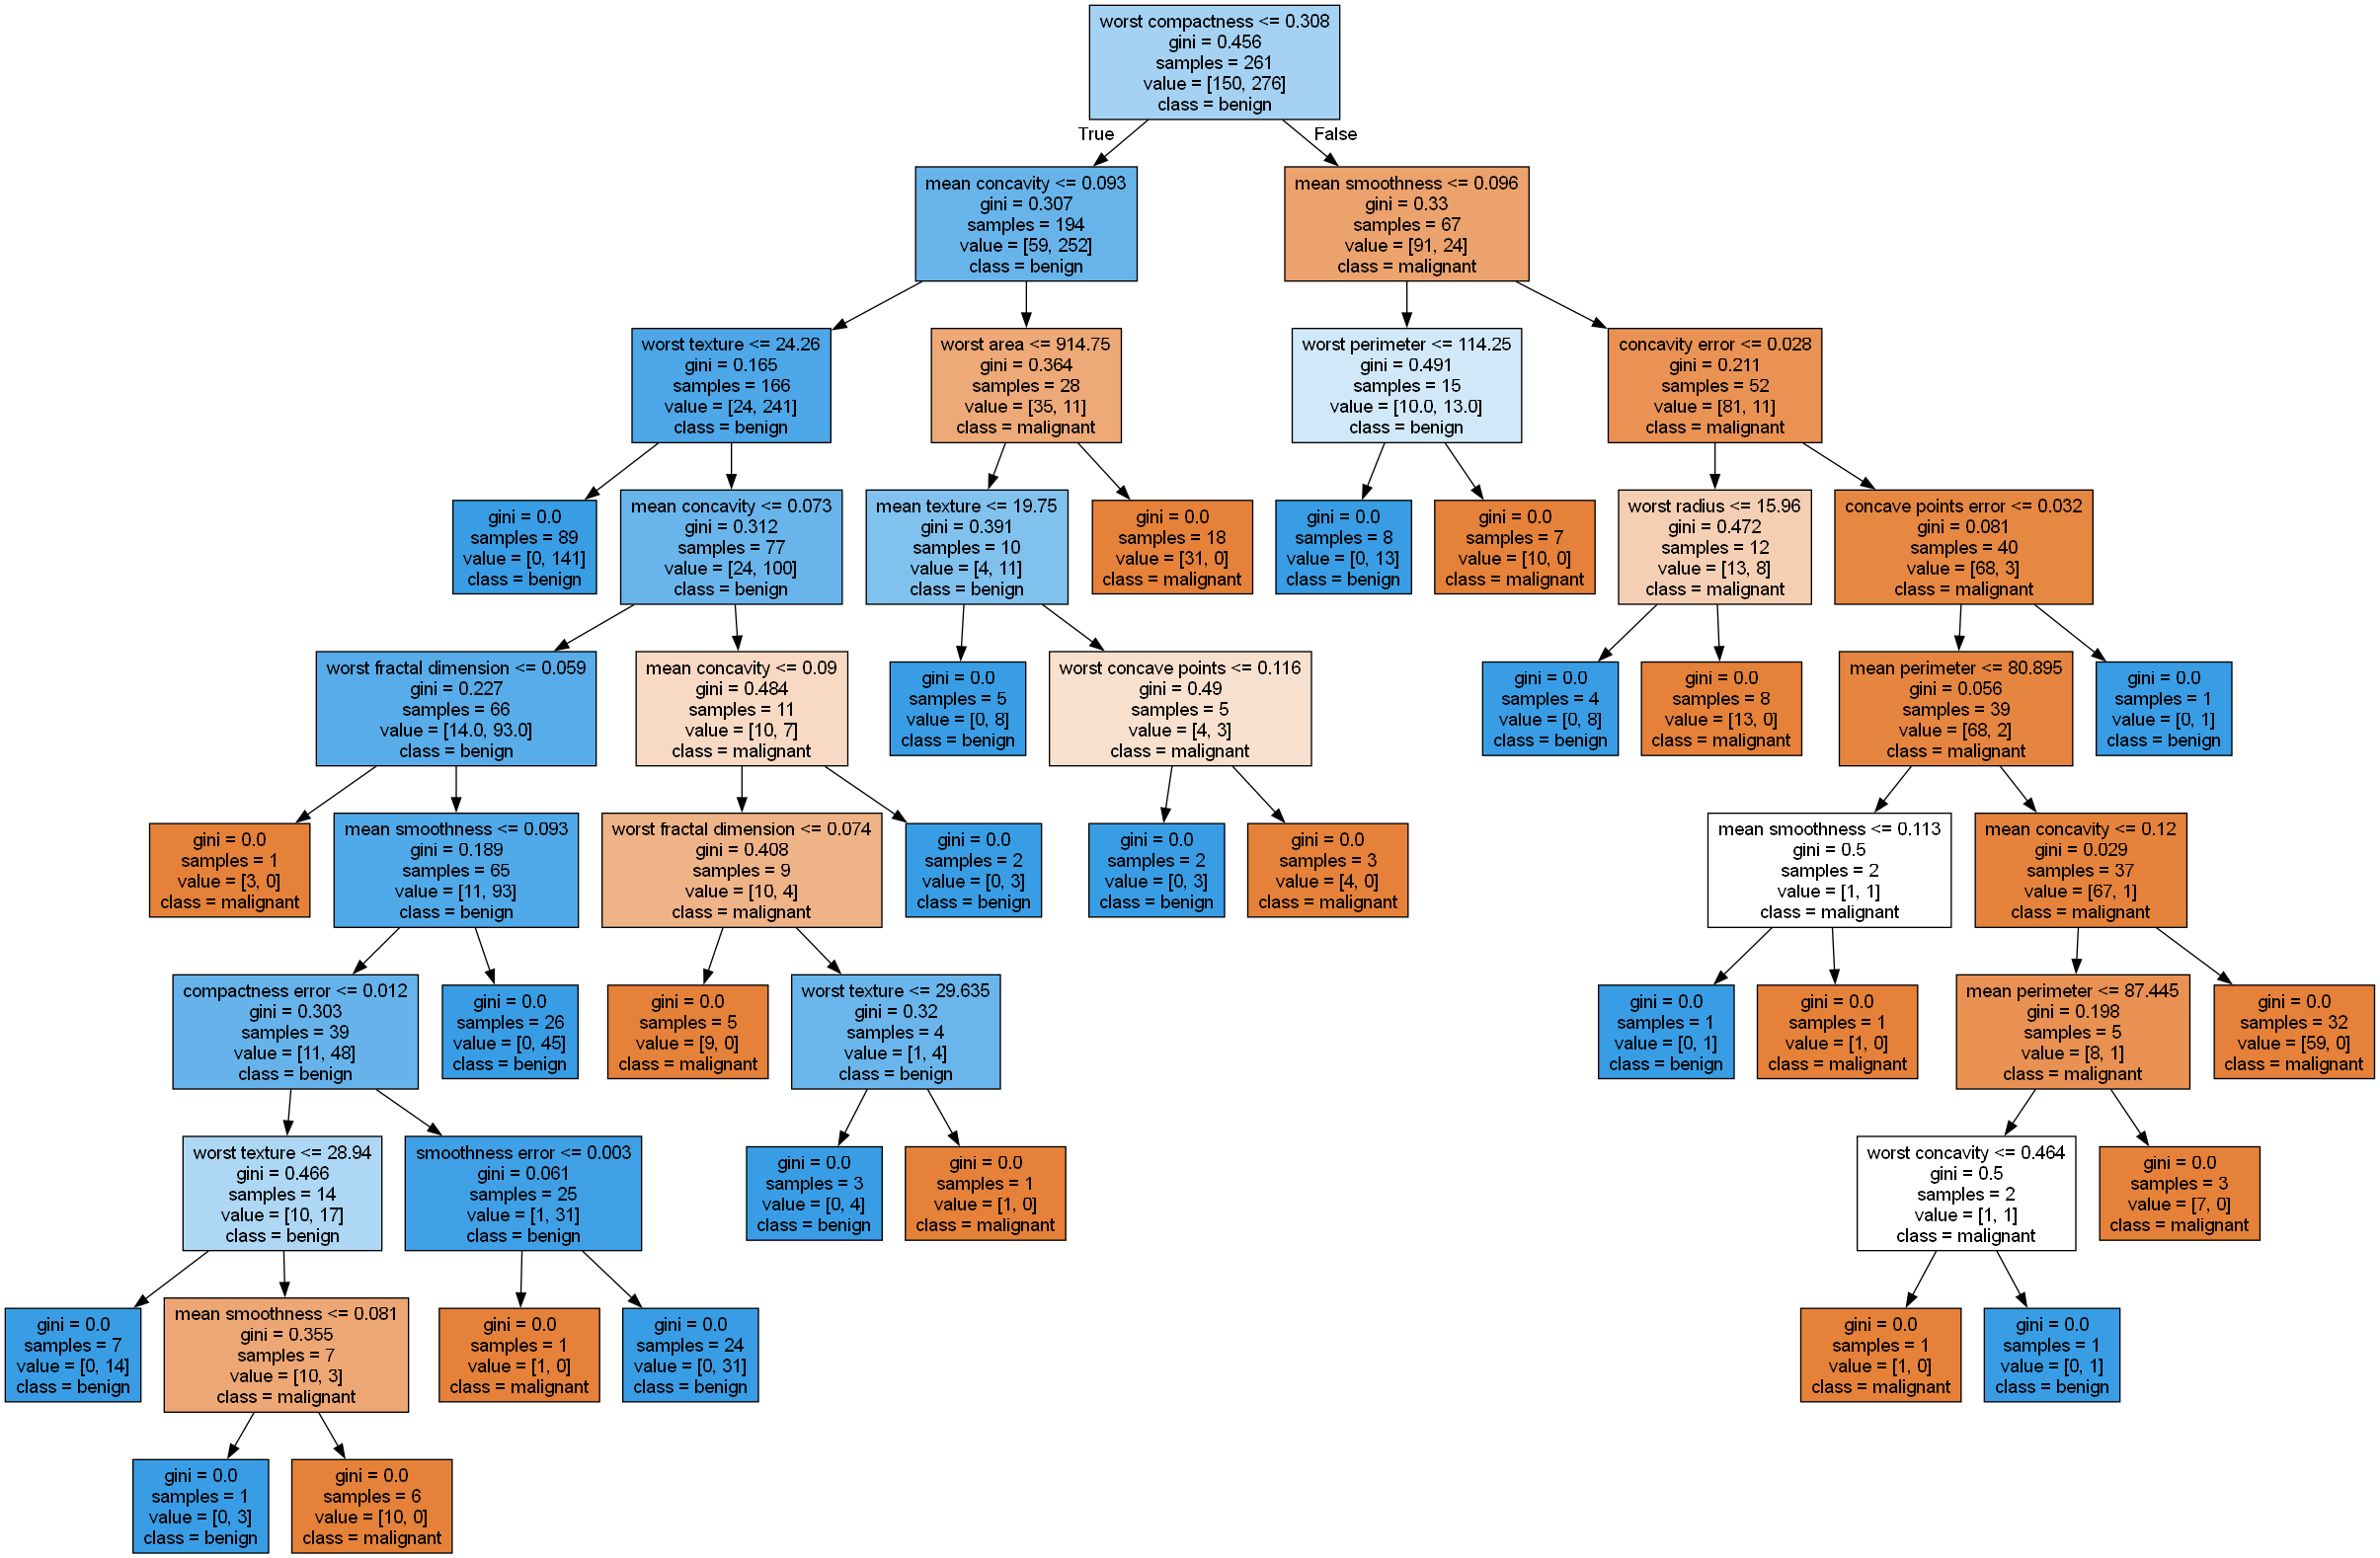

In [13]:
# Create directory if it doesn't exist
output_dir = "images_trees"
os.makedirs(output_dir, exist_ok=True)  # Create folder if not exists

for name, clf in models.items():  
    if isinstance(clf, DecisionTreeClassifier) or isinstance(clf, RandomForestClassifier):
        print(f"{name} Classifier")
        # Visualize the first decision tree for RandomForest
        tree_to_visualize = clf if isinstance(clf, DecisionTreeClassifier) else clf.estimators_[0]

        graph_viz = tree.export_graphviz(
            tree_to_visualize, 
            out_file=None,
            feature_names=feature_names, 
            class_names=labels, 
            filled=True
        )

        graph = graphviz.Source(graph_viz, format="png")

        # Save to images_trees directory
        filename = f"{output_dir}/{name}_tree_img"
        filepath = os.path.abspath(filename)  # Get absolute file path

        graph.render(filepath, format="png", cleanup=True)  # Keep the file after rendering

        # Display a smaller version of the image
        display(Image(filename=f"{filepath}.png", width=1000, height=1000))  # Adjust image size
